In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.fftpack

%matplotlib inline

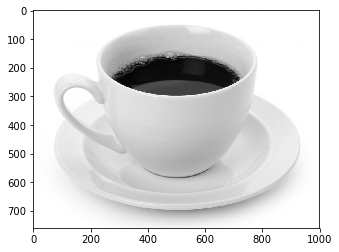

In [2]:
# Load an image (Cookie.jpg, Coffee.jpg, or Cardinal) as a black and white image

fname = './data/coffee.jpg'
img = cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, origin='upper', cmap='gray')
plt.show()
plt.close('all')

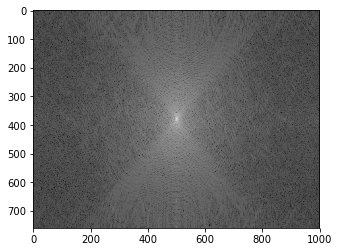

In [3]:
# Do the fourier transform of the image, display the (shifted) fourier spectrum in log10

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log10(np.abs(fshift)+1)

plt.imshow(magnitude_spectrum ,cmap='gray')
plt.show()
plt.close('all')

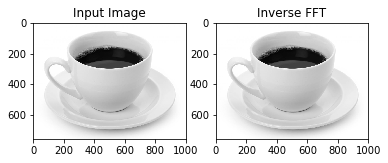

In [4]:
# Do the inverse fourier transform, display inversed image

def show_inverse_fft(img, fshift):
    ''' Show original image and inverse of given fft '''
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image')
    plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
    plt.title('Inverse FFT')
    plt.show()
    plt.close('all')
    
show_inverse_fft(img, fshift)

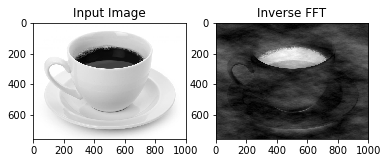

In [5]:
# Create a random boolean mask with a parameter for the ratio

rows, cols = img.shape
mask = np.random.choice([1, 0], size=(rows, cols))

# Apply the boolean mask to frequency spectrum of image,
# setting masked values to zero, and show spectrum and 
# inversed image after applying mask

fshift_masked = fshift*mask
show_inverse_fft(img, fshift_masked)

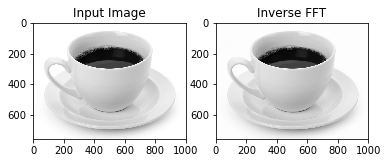

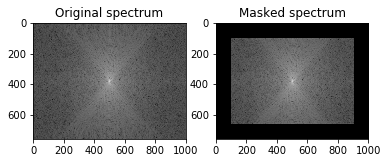

In [6]:
# Create a boolean mask, masking the lowest absolute values. 
# Again use a parameter to set the ratio.

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
threshold = 100

# Apply the boolean mask to frequency spectrum of image, 
# setting masked values to zero, and show spectrum and 
# inversed image after applying mask

# This is probably not the best way to mask but oh well
fshift_2 = fshift.copy()
fshift_2[0:threshold, 0::] = 0
fshift_2[rows-threshold:rows, 0::] = 0
fshift_2[0::, 0:threshold] = 0
fshift_2[0::, cols-threshold::] = 0

magnitude_spectrum = np.log10(np.abs(fshift)+1)
magnitude_spectrum_2 = np.log10(np.abs(fshift_2)+1)

show_inverse_fft(img, fshift_2)
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Original spectrum')
plt.subplot(122),plt.imshow(magnitude_spectrum_2, cmap = 'gray')
plt.title('Masked spectrum')
plt.show()
plt.close('all')